In [1]:
import keras
from keras.api.datasets import mnist
from keras.api.models import Sequential
from keras.api.layers import Dense, Dropout, Activation
from keras.api.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.api.layers import BatchNormalization
import h5py

# 自分で設定するパラメータ

# バッチサイズ
batch_size = 2000

# エポック数
epochs = 100



# データ抽出
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



# モデルの構築
model = Sequential()

# 最初の隠れ層(入力784 -> 出力256)
model.add(Dense(256, activation="relu",input_shape=(784,)))
model.add(Dropout(0.1))

# 2つ目の隠れ層(256 -> 出力128)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

# 3つ目の隠れ層(128 -> 出力32)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

# 出力層(入力32 -> 出力10)
model.add(Dense(10, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコアの計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples


/Users/pancho/git/dnn/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0940 - loss: 2.3231 - val_accuracy: 0.1612 - val_loss: 2.2434
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1720 - loss: 2.2425 - val_accuracy: 0.3331 - val_loss: 2.1571
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2725 - loss: 2.1635 - val_accuracy: 0.4426 - val_loss: 2.0538
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3677 - loss: 2.0619 - val_accuracy: 0.5283 - val_loss: 1.9273
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4330 - loss: 1.9519 - val_accuracy: 0.6037 - val_loss: 1.7834
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5001 - loss: 1.8175 - val_accuracy: 0.6537 - val_loss: 1.6304
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5428 - loss: 1.6871 - val_accuracy: 0.6861 - val_loss: 1.4766
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5775 - loss: 1.5463 - val_accuracy: 0.

In [2]:
model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.9152 - loss: 0.2688


[0.2294570803642273, 0.9294000267982483]

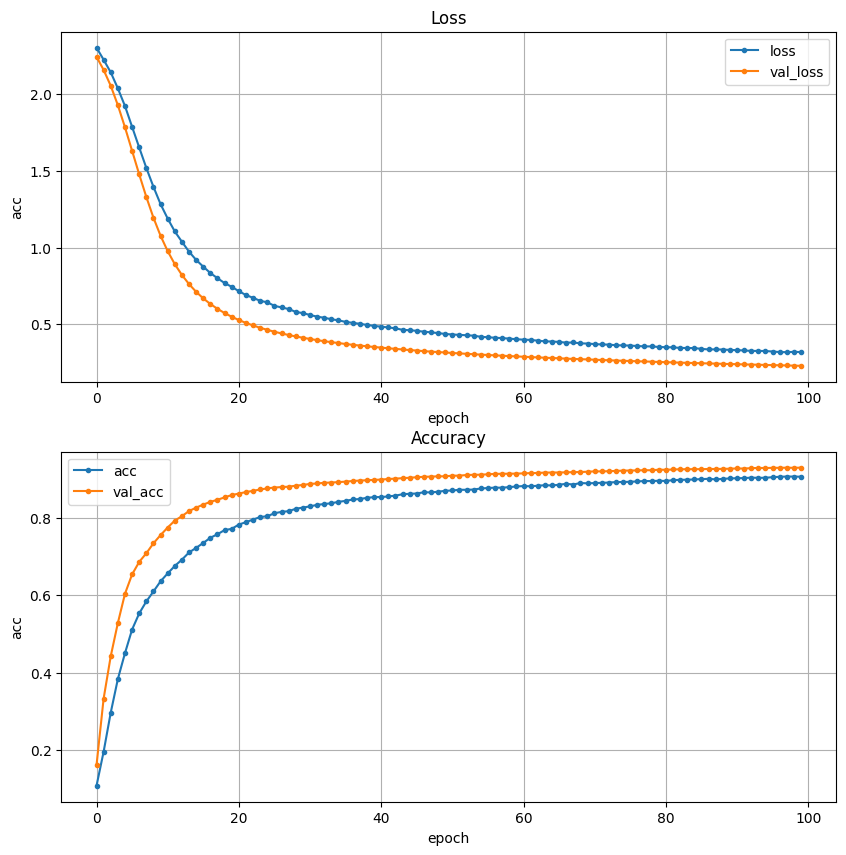

In [3]:
# 学習の様子をプロット
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.savefig('./output/result.png')
plt.show()

In [7]:
import numpy as np
from PIL import Image
import os

with os.scandir('./input') as entries:
    items = [entry.name for entry in entries if entry.is_file()]

data = []
file_name = []

for file in items:
    if file == '.DS_Store':
        continue
    data.append(Image.open(f'./input/{file}').convert('L'))
    file_name.append(file)

data = np.array(data)
x_pre = data.reshape(len(data), 784)
x_pre = x_pre.astype('float32')
x_pre /= 255
y_pre = model.predict(x_pre)
print(y_pre)

for i in range(len(data)):
    print(file_name[i], np.argmax(y_pre[i]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[7.06226900e-02 1.25526890e-01 8.50723833e-02 8.53222832e-02
  9.67655927e-02 1.58638373e-01 9.67211127e-02 1.24405399e-01
  5.84772266e-02 9.84480903e-02]
 [2.37014201e-02 4.46487702e-02 2.01402456e-01 4.59836517e-03
  5.33692949e-02 1.77794978e-01 3.97948712e-01 4.00681049e-03
  8.34778696e-02 9.05130338e-03]
 [1.94447394e-02 3.27097252e-02 2.93414928e-02 2.68925354e-02
  1.25626162e-01 4.10545945e-01 6.06484935e-02 1.32820150e-02
  6.09708130e-02 2.20538080e-01]
 [2.10499321e-03 8.43183231e-03 9.06688631e-01 6.02973346e-03
  2.77498411e-03 8.89363233e-03 3.00645828e-02 2.67664646e-03
  3.16101052e-02 7.24766869e-04]
 [2.89174914e-02 1.27315121e-02 4.19404767e-02 5.75245060e-02
  1.27508575e-02 2.84785759e-02 1.12658907e-02 7.26522326e-01
  1.54867526e-02 6.43816292e-02]
 [1.59918871e-02 2.70661805e-02 7.77726062e-03 3.96276452e-02
  3.31630707e-02 6.42144978e-01 1.66697353e-02 8.90595187e-03
  1.58764973e-01 4.98882793e-02]
 [2.68166326e-02 7.5

In [8]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
import tensorflow as tf
tf.test.is_gpu_available()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


False